# Colab setup

Preparazione dell'ambiente di esecuzione del colab notebook. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Colab_yelp/Yelp-Data-Analysis

In [ ]:
! git pull

In [ ]:
! pip install -q -U "tensorflow-text==2.8.*"
! pip install -q tf-models-official==2.7.0
! pip install keras-tuner

# TASK 3

Ogni recensione lasciata sul sito Yelp può ricevere feedback da altri utenti, che possono contrassegnarla come *funny*, *cool* e/o *useful*.

L'obbiettivo del presente studio è quello di valutare diverse tecniche di machine learning fini alla predizione dell'utilità di una review.
Il problema è stato trattato in due modi differenti:
- Problema di regressione: predizione numero di feedback *useful*
- Problema di classificazione: predizione livello (classe) di utilità:
    - 'not useful' (voti 'useful' <=5 )
    - 'moderetely useful' (5 < voti 'moderetely useful' <=25 )
    - 'extremely useful' (25 < voti 'extremely useful')

In [1]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from official.nlp import optimization

# from libraries import data_handler
from libraries import data_handler
from libraries.dataset import Dataset

import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
import keras_tuner as kt

import libraries.preprocessing_utils as prep_utils
import libraries.models_builders as models_builders
import libraries.filenames_generator as filenames  
import constants as const

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aless_vzq3wiu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aless_vzq3wiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aless_vzq3wiu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.test.gpu_device_name())

Num GPUs Available:  1
/device:GPU:0


## Data retrieving

In [6]:
data = data_handler.load_dataset('review')

	Unpickling./data/pickled/review.pkl...
	File unpickled in 1.571 minutes


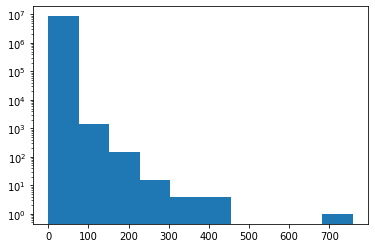

In [8]:
plt.hist(data['useful'], log=True)
plt.show()

In [15]:
data['usefulness'].value_counts()

not useful           8248608
moderately useful     273843
extremely useful       17619
Name: usefulness, dtype: int64

In [3]:
review_data = Dataset('review', 'usefulness')

# 20_000 elements for each class
review_data.split(['text', 'useful'], 'usefulness', val_size=0.1, test_size=0.1, n_samples=25_000)

Reading ./data/balanced_review_usefulness_train.csv...
File loaded in 0.036 minutes
Reading ./data/balanced_review_usefulness_val.csv...
File loaded in 0.01 minutes
Reading ./data/balanced_review_usefulness_test.csv...
File loaded in 0.0049 minutes


## Data preprocessing comune

In [4]:
prep_train_data = prep_utils.preprocess_texts(review_data.train_data[0]['text'], path= filenames.picked_cleaned_sentences(
        "train", "task3"))

prep_test_data = prep_utils.preprocess_texts(review_data.test_data[0]['text'], path= filenames.picked_cleaned_sentences(
        "test", "task3"))

prep_val_data = prep_utils.preprocess_texts(review_data.val_data[0]['text'], path= filenames.picked_cleaned_sentences(
        "val", "task3"))


Loading pickled cleaned sentences data from ./data/pickled/task3_train_cleaned_sentences.pkl...
Loading pickled cleaned sentences data from ./data/pickled/task3_test_cleaned_sentences.pkl...
Loading pickled cleaned sentences data from ./data/pickled/task3_val_cleaned_sentences.pkl...


## Training dei modelli
I classificatori testati in questo studio sono:
- **LSTM**
- **BERT**

I regressori:
- **LSTM**
- **BERT**
